# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
%matplotlib inline
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv('/Users/onurhanaydin/Desktop/Data Science/Assigments/Assigment-Matplotlib/PoliceKillingsUS.csv', encoding="windows-1252")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1: Plot number of people by gender

In [3]:
df.sort_values(["gender"],ascending = False)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1673,1897,Adrian Joseph Shaffer,10/09/16,shot,gun,37.0,M,W,Boulder,CO,False,attack,Not fleeing,True
1666,1871,Sadiq Bishara-Abaker Idris,07/09/16,shot,gun,25.0,M,B,Wyoming,MI,False,attack,Not fleeing,False
1667,1872,Francis Perry,08/09/16,shot,gun,32.0,M,W,Lakeland,FL,False,attack,Not fleeing,False
1668,1873,Jose Torres,08/09/16,shot,toy weapon,38.0,M,H,Delhi,CA,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,521,Christie Cathers,05/06/15,shot,vehicle,45.0,F,W,Morgantown,WV,False,other,Car,False
1333,1518,Deresha Armstrong,05/05/16,shot,gun,26.0,F,B,Orlando,FL,False,attack,Not fleeing,False
838,987,Laura Lemieux,05/11/15,shot,gun,36.0,F,W,Goose Creek,SC,True,attack,Not fleeing,False
1385,1581,Tk Tk,26/05/16,shot,knife,NaN,F,NaN,Sneads,FL,False,other,Not fleeing,False


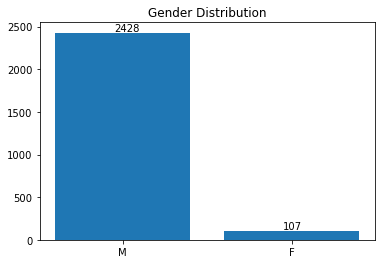

In [4]:
# with matplotlib

fig, ax = plt.subplots()

x=df.gender.value_counts().index
y=df.gender.value_counts().values

ax.bar(x,y)
ax.set_title("Gender Distribution")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+20));

## 2: Plot 7 most common kill weapons

In [5]:
df.armed.value_counts()[0:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

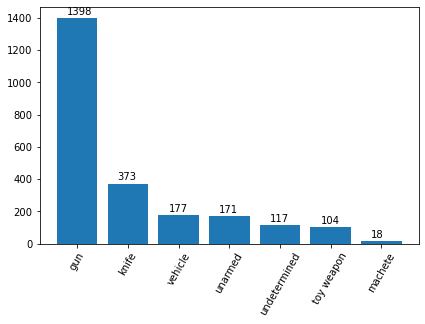

In [6]:
fig, ax = plt.subplots()

x=df.armed.value_counts()[0:7].index
y=df.armed.value_counts()[0:7].values

plt.xticks(rotation=60)

plt.tight_layout()

ax.bar(x,y)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height()+20));

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [9]:
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [20]:
df['age_cat'] = df['age'].apply(lambda x: 'above25' if x > 25 else 'below25')

In [18]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,above25
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,below25
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [21]:
df.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

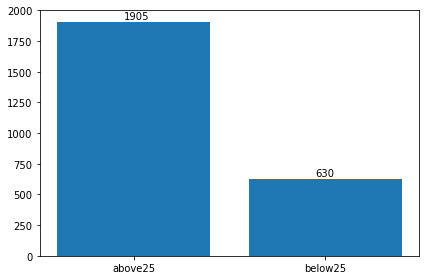

In [25]:
# with matplotlib
fig, ax = plt.subplots()

x=df.age_cat.value_counts().index
y=df.age_cat.value_counts().values

plt.tight_layout()

ax.bar(x,y)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+20));

## 4: Plot number of killed poeple by race

In [29]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

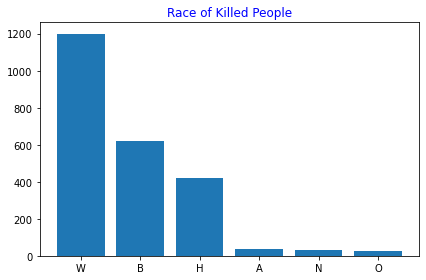

In [31]:
# with matplotlib

fig, ax = plt.subplots()

x=df.race.value_counts().index
y=df.race.value_counts().values

ax.set_title("Race of Killed People", color="b")

plt.tight_layout()
ax.bar(x,y);

## 5: Killed People According to Races (Pie Chart)

In [33]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [34]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [32]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [49]:
df=df.dropna()

In [50]:
df.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [82]:
df.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [87]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

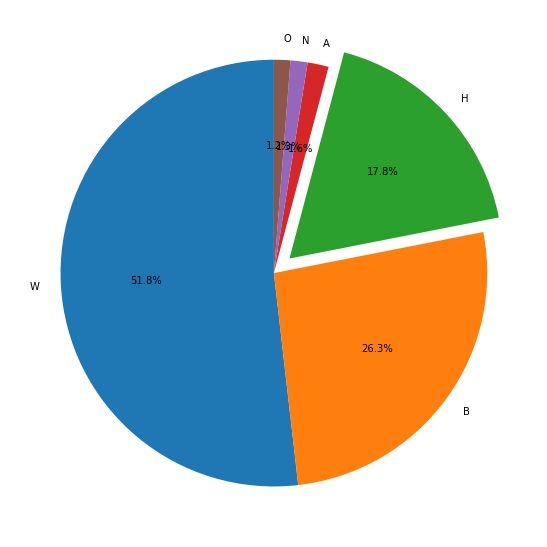

In [117]:
labels = df.race.value_counts().index
sizes = df.race.value_counts()
explode = (0, 0, 0.1, 0, 0, 0) # to highlight H slice

fig1, ax1 = plt.subplots(figsize=(9,8))
plt.tight_layout()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', startangle=90);